# HELLO FELLOW GROUP MEMBERS! IF YOU'RE CONTRIBUTING, MAKE SURE TO: 
1. Use snake case, like this: (snake_case) instead of camel case, like this: (camelCase). Whitespace is a lot easier to read. 
2. Use the ascribed format shown later down. 
3. The more comments or markdown comments the better. I'm probably setting a bad example, but it helps. 
4. Ask questions! If something is wrong or confusing, be sure to ask.
5. Always use seed 42. It's the meaning of life, after all. 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns 
%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
dataset = pd.read_csv('BankChurners.csv')
dataset.head()




,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
dataset['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [4]:
truncated_dataset = dataset.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)

We'll drop these columns, as we don't need them. Worst comes to worst, I'll use clientnum as an index variable. Not sure yet. 

In [5]:
truncated_dataset.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


We need to encode the string data so that our algorithm can work with them.

In [6]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
encoded_dataset = truncated_dataset
encoded_dataset['Attrition_Flag'] = le.fit_transform(dataset.Attrition_Flag.values)
print(dict(zip(le.classes_, le.transform(le.classes_))))
encoded_dataset['Education_Level'] = le.fit_transform(dataset.Education_Level.values)
print(dict(zip(le.classes_, le.transform(le.classes_))))
encoded_dataset['Dependent_count'] = le.fit_transform(dataset.Dependent_count.values)
#print(dict(zip(le.classes_, le.transform(le.classes_))))
encoded_dataset['Marital_Status'] = le.fit_transform(dataset.Marital_Status.values)
print(dict(zip(le.classes_, le.transform(le.classes_))))

encoded_dataset['Income_Category'] = le.fit_transform(dataset.Income_Category.values)
print(dict(zip(le.classes_, le.transform(le.classes_))))

encoded_dataset['Card_Category'] = le.fit_transform(dataset.Card_Category.values)
print(dict(zip(le.classes_, le.transform(le.classes_))))

encoded_dataset['Gender'] = le.fit_transform(dataset.Gender.values)
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Attrited Customer': 0, 'Existing Customer': 1}
{'College': 0, 'Doctorate': 1, 'Graduate': 2, 'High School': 3, 'Post-Graduate': 4, 'Uneducated': 5, 'Unknown': 6}
{'Divorced': 0, 'Married': 1, 'Single': 2, 'Unknown': 3}
{'$120K +': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K': 3, 'Less than $40K': 4, 'Unknown': 5}
{'Blue': 0, 'Gold': 1, 'Platinum': 2, 'Silver': 3}
{'F': 0, 'M': 1}


As seen above, these are the dummy variables we've encoded, and their associated value maps. 

In [7]:
encoded_dataset.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# IMPORTANT! I AM UNSURE AS TO IF CERTAIN COLUMNS WILL BE STANDARDIZED OR NOT, SUCH AS DEPENDENT COUNT. I'VE ASKED THE PROFESSOR, BUT THE VARIABLES ARE SUBJECT TO CHANGE.
I'll split the data into three parts: the non ordinal columns, which we'll standardize, the ordinal columns which we won't standardize, and the target, which we won't standardize either. 

In [8]:
non_ordinal_col = encoded_dataset.drop(['Attrition_Flag', 'Education_Level','Dependent_count','Marital_Status','Income_Category', 'Card_Category', 'Gender'], axis=1)
ordinal_col = encoded_dataset[['Education_Level','Dependent_count','Marital_Status','Income_Category', 'Card_Category', 'Gender']].copy()
target = encoded_dataset[['Attrition_Flag']].copy()

In [9]:
non_ordinal_col.head()

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [10]:
ordinal_col.head()

,Education_Level,Dependent_count,Marital_Status,Income_Category,Card_Category,Gender
0,3,3,1,2,0,1
1,2,5,2,4,0,0
2,2,3,1,3,0,1
3,3,4,3,4,0,0
4,5,3,1,2,0,1


In [11]:
target.head()

,Attrition_Flag
0,1
1,1
2,1
3,1
4,1


In [12]:
non_ordinal_col_standardized = preprocessing.scale(non_ordinal_col)
non_ordinal_col_standardized = pd.DataFrame(non_ordinal_col_standardized, index = dataset.index, columns = non_ordinal_col.columns)

Below, we can see our non ordinal columns are now standardized:

In [13]:
non_ordinal_col_standardized.describe()

,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04,1.012700e+04
mean,3.127744e-17,-5.687166e-16,8.453372e-15,-2.129892e-15,1.588144e-15,9.430893e-16,-1.830898e-15,-4.386159e-17,2.801869e-16,-5.134192e-16,1.194179e-14,-1.306570e-16,-2.298338e-16
std,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00
min,-2.535541e+00,-2.871068e+00,-1.809512e+00,-2.316674e+00,-2.219655e+00,-7.915266e-01,-1.426858e+00,-8.213361e-01,-3.466947e+00,-1.146344e+00,-2.337256e+00,-2.991597e+00,-9.971550e-01
25%,-6.643815e-01,-6.171294e-01,-5.227845e-01,-3.375979e-01,-4.116160e-01,-6.686548e-01,-9.863389e-01,-6.759604e-01,-5.882438e-01,-6.619405e-01,-8.460801e-01,-5.469820e-01,-9.137243e-01
50%,-4.066159e-02,8.964513e-03,1.205790e-01,-3.375979e-01,-4.116160e-01,-4.492525e-01,1.388875e-01,-4.394979e-01,-1.092203e-01,-1.486877e-01,9.123036e-02,-4.293775e-02,-3.587287e-01
75%,7.078024e-01,5.098397e-01,7.639426e-01,6.519402e-01,4.924038e-01,2.679862e-01,7.622408e-01,2.629041e-01,4.519214e-01,9.918090e-02,6.877007e-01,4.443050e-01,8.274384e-01
max,3.327426e+00,2.513340e+00,1.407306e+00,3.620555e+00,3.204463e+00,2.848054e+00,1.661686e+00,2.975375e+00,1.203060e+01,4.144855e+00,3.158792e+00,1.260857e+01,2.626640e+00


In [14]:
dataset_standardized = pd.concat([ordinal_col, non_ordinal_col_standardized], axis=1)

In [15]:
dataset_standardized.head()

,Education_Level,Dependent_count,Marital_Status,Income_Category,Card_Category,Gender,Customer_Age,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,3,3,1,2,0,1,-0.165406,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,2,5,2,4,0,0,0.333570,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,2,3,1,3,0,1,0.583058,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,3,4,3,4,0,0,-0.789126,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,5,3,1,2,0,1,-0.789126,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155


Note to group: I have no clue on what variables or not to sample. I've already emailed the professor about this question by the time this is done. 

In [16]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


undersampler = RandomUnderSampler(sampling_strategy='majority')
oversampler = RandomOverSampler(sampling_strategy='minority')
smotesampler = SMOTE(sampling_strategy='minority')

In [17]:
raveled_target = target.values.ravel() # made to supress a warning. Converts a y column to a 1d array. 
predictors_oversampled, target_oversampled = oversampler.fit_resample(dataset_standardized, raveled_target)
predictors_undersampled, target_undersampled = undersampler.fit_resample(dataset_standardized, raveled_target)
predictors_smotesampled, target_smotesampled = smotesampler.fit_resample(dataset_standardized, raveled_target)


In [18]:
import sklearn.linear_model as skl_lm
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

predictors_over_train, predictors_over_test, target_over_train, target_over_test = train_test_split(predictors_oversampled, target_oversampled, test_size = 0.2,  random_state = 42)
predictors_under_train, predictors_under_test, target_under_train, target_under_test = train_test_split(predictors_undersampled, target_undersampled, test_size = 0.2,  random_state = 42)
predictors_smote_train, predictors_smote_test, target_smote_train, target_smote_test = train_test_split(predictors_smotesampled, target_smotesampled, test_size = 0.2,  random_state = 42)

# IMPORTANT! I MIGHT'VE MESSED UP IN SPLITTING THE DATASET ONLY INTO TRAINING AND TEST, IT MAY TURN INTO TRAINING, TEST, AND VALIDATION. KEEP THAT IN MIND, AS THE FORMAT MAY CHANGE TO USE VALIDATION VARIABLES INSTEAD.

The main format for the classifiers is as such: 
1. Fit the data. 
2. Check it's training precision and recall using cross_val_predict using training variables. 
3. Use the classifier .predict() function to gather a non cross validated prediction using test variables instead. This is necessary to use our gather our test results. 
4. Using test variables, gather the precision and recall. 
5. Using test variables and the fitted model(i.e. knn), plot the PR curve. 
6. Using test variables and the non cross validated prediction, produce a classification report. This is distinct from our previous recall and precision samples since it breaks it down by category. Category 1 is more important, as those the customers that are churning. 

## Classifiers using over sampling

### KNN (N=5)

KNN Training Precision Score for Oversampling:  0.9473511563063802
KNN Training Recall Score for Oversampling:  0.8464243845252052
KNN Test Precision Score for Oversampling:  0.9649725274725275
KNN Test Recall Score for Oversampling:  0.8383054892601431
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1724
           1       0.96      0.84      0.90      1676

    accuracy                           0.91      3400
   macro avg       0.91      0.90      0.90      3400
weighted avg       0.91      0.91      0.90      3400



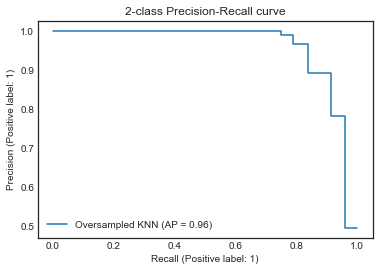

In [19]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import precision_score, recall_score 

#P.s. These comments are only on this certain classifier, sorry, as I forgot to put them on earlier!
#This'll show you an example of how we'll make our metrics. Again, do remember that validation variables may be used in the future
#instead. 

neighbor = knn(n_neighbors=5) #the base classifier, this'll be something like KNN, SGD, etc..
neighbor.fit(predictors_over_train, target_over_train) #fitting for the training data. 

#Cross validation prediction. This is used for our prediction scores for our training sets. 
predict_neighbor = cross_val_predict(neighbor, predictors_over_train, target_over_train, cv=10) 
#Test Precision and recall. Use the format: target_[SAMPLER]_train, [CROSS_VAL_PREDICT_VARIABLE NAME].
print ("KNN Training Precision Score for Oversampling: ", precision_score(target_over_train, predict_neighbor))
print ("KNN Training Recall Score for Oversampling: " , recall_score(target_over_train, predict_neighbor))

#Our regular prediction. Use test or validation instead. 
predict_neighbor_test = neighbor.predict(predictors_over_test)
#Test Precision and recall. Use the format: target_[SAMPLER]_test, [PREDICT_REGULAR_VARIABLE NAME].
print ("KNN Test Precision Score for Oversampling: ", precision_score(target_over_test, predict_neighbor_test))
print ("KNN Test Recall Score for Oversampling: " , recall_score(target_over_test, predict_neighbor_test))


from sklearn.metrics import PrecisionRecallDisplay
#Our PR curve. Use the Format for the args(test might be replaced with validation): 
    #[FITTED CLASSIFIER NAME], predictors_[SAMPLER]_test, target_[SAMPLER]_test, name = "[SAMPLERNAME] [CLASSIFIER NAME]"
display = PrecisionRecallDisplay.from_estimator(
    neighbor, predictors_over_test, target_over_test, name="Oversampled KNN"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

#A classification report. This'll help us get a more detailed view of our precision, recall, and f1 scores. 
#Honestly, tempted to cut out the middleman, let me know what you guys think. 
#Use the format for the args: 
    #target_[SAMPLER]_test, [REGULAR_PREDICT_NAME]_test.
print(classification_report(target_over_test, predict_neighbor_test ))


### SGD

Train Precision Score for SGD:  0.8375748502994012
Train Recall Score for SGD:  0.8199003516998827
Test Precision Score for SGD:  0.8140449438202247
Test Recall Score for SGD:  0.8645584725536993


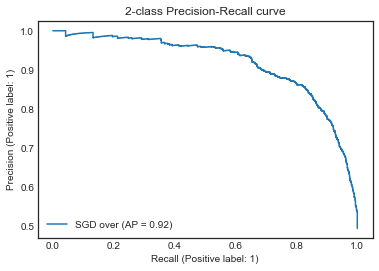

In [20]:
from sklearn.linear_model import SGDClassifier as sgd 

sgd_class = sgd(max_iter=1000, tol =1e-3, random_state = 42) 
sgd_class.fit(predictors_over_train, target_over_train)


sgd_predict = cross_val_predict(sgd_class, predictors_over_train, target_over_train, cv=10)
print ("Train Precision Score for SGD: ", precision_score(target_over_train, sgd_predict))
print ("Train Recall Score for SGD: " , recall_score(target_over_train, sgd_predict))


sgd_predict_test = sgd_class.predict(predictors_over_test)


print ("Test Precision Score for SGD: ", precision_score(target_over_test, sgd_predict_test))
print ("Test Recall Score for SGD: " , recall_score(target_over_test, sgd_predict_test))
display = PrecisionRecallDisplay.from_estimator(
    sgd_class, predictors_over_test, target_over_test, name="SGD over"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

## Classifiers using under sampling

### KNN (N=5)

KNN Training Precision Score for Undersampling:  0.8358547655068078
KNN Training Recall Score for Undersampling:  0.8339622641509434
KNN Test Precision Score for Undersampling:  0.8069620253164557
KNN Test Recall Score for Undersampling:  0.8443708609271523
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       349
           1       0.81      0.84      0.83       302

    accuracy                           0.83       651
   macro avg       0.83      0.83      0.83       651
weighted avg       0.84      0.83      0.83       651



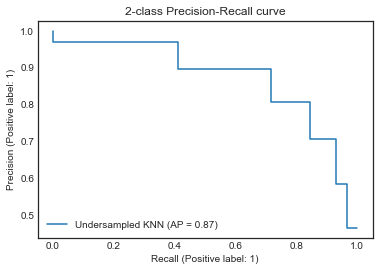

In [21]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import precision_score, recall_score 


neighbor = knn(n_neighbors=5)
neighbor.fit(predictors_under_train, target_under_train)

predict_neighbor = cross_val_predict(neighbor, predictors_under_train, target_under_train, cv=10)
print ("KNN Training Precision Score for Undersampling: ", precision_score(target_under_train, predict_neighbor))
print ("KNN Training Recall Score for Undersampling: " , recall_score(target_under_train, predict_neighbor))

predict_neighbor_test = neighbor.predict(predictors_under_test)
print ("KNN Test Precision Score for Undersampling: ", precision_score(target_under_test, predict_neighbor_test))
print ("KNN Test Recall Score for Undersampling: " , recall_score(target_under_test, predict_neighbor_test))


display = PrecisionRecallDisplay.from_estimator(
    neighbor, predictors_under_test, target_under_test, name="Undersampled KNN"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")
print(classification_report(target_under_test, predict_neighbor_test ))


### SGD

Train Precision Score for SGD Under:  0.7628330084470435
Train Recall Score for SGD Under:  0.8860377358490567
Test Precision Score for SGD Under:  0.7925696594427245
Test Recall Score for SGD Under:  0.847682119205298
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       349
           1       0.79      0.85      0.82       302

    accuracy                           0.83       651
   macro avg       0.83      0.83      0.83       651
weighted avg       0.83      0.83      0.83       651



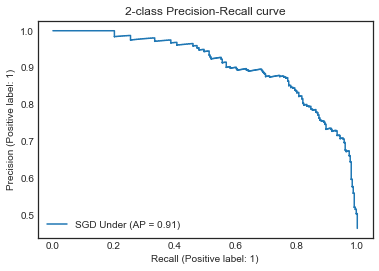

In [22]:
from sklearn.linear_model import SGDClassifier as sgd 

sgd_class = sgd(max_iter=1000, tol =1e-3, random_state = 42) 
sgd_class.fit(predictors_under_train, target_under_train)


sgd_predict = cross_val_predict(sgd_class, predictors_under_train, target_under_train, cv=10)
print ("Train Precision Score for SGD Under: ", precision_score(target_under_train, sgd_predict))
print ("Train Recall Score for SGD Under: " , recall_score(target_under_train, sgd_predict))


sgd_predict_test = sgd_class.predict(predictors_under_test)


print ("Test Precision Score for SGD Under: ", precision_score(target_under_test, sgd_predict_test))
print ("Test Recall Score for SGD Under: " , recall_score(target_under_test, sgd_predict_test))
display = PrecisionRecallDisplay.from_estimator(
    sgd_class, predictors_under_test, target_under_test, name="SGD Under"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")
print(classification_report(target_under_test, sgd_predict_test))


## Classifiers using SMOTE sampling

### KNN (N=5)

KNN Training Precision Score for SMOTE:  0.9850796880298406
KNN Training Recall Score for SMOTE:  0.8514067995310668
KNN Test Precision Score for SMOTE:  0.9884038199181446
KNN Test Recall Score for SMOTE:  0.8645584725536993
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1724
           1       0.99      0.86      0.92      1676

    accuracy                           0.93      3400
   macro avg       0.94      0.93      0.93      3400
weighted avg       0.93      0.93      0.93      3400



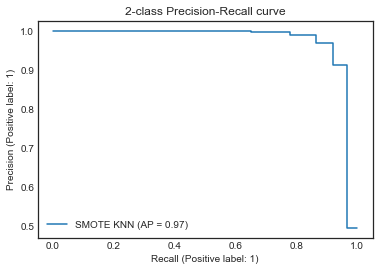

In [23]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import precision_score, recall_score 


neighbor = knn(n_neighbors=5)
neighbor.fit(predictors_smote_train, target_smote_train)

predict_neighbor = cross_val_predict(neighbor, predictors_smote_train, target_smote_train, cv=10)
print ("KNN Training Precision Score for SMOTE: ", precision_score(target_smote_train, predict_neighbor))
print ("KNN Training Recall Score for SMOTE: " , recall_score(target_smote_train, predict_neighbor))

predict_neighbor_test = neighbor.predict(predictors_smote_test)
print ("KNN Test Precision Score for SMOTE: ", precision_score(target_smote_test, predict_neighbor_test))
print ("KNN Test Recall Score for SMOTE: " , recall_score(target_smote_test, predict_neighbor_test))


display = PrecisionRecallDisplay.from_estimator(
    neighbor, predictors_smote_test, target_smote_test, name="SMOTE KNN"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")
print(classification_report(target_over_test, predict_neighbor_test ))

### SGD

Train Precision Score for SGD:  0.8571006790670209
Train Recall Score for SGD:  0.8508206330597889
Test Precision Score for SGD:  0.9259525521207764
Test Recall Score for SGD:  0.7684964200477327
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1724
           1       0.93      0.77      0.84      1676

    accuracy                           0.86      3400
   macro avg       0.87      0.85      0.85      3400
weighted avg       0.87      0.86      0.85      3400



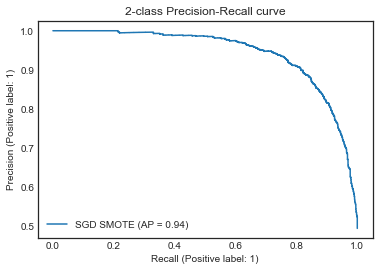

In [24]:
from sklearn.linear_model import SGDClassifier as sgd 

sgd_class = sgd(max_iter=1000, tol =1e-3, random_state = 42) 
sgd_class.fit(predictors_smote_train, target_smote_train)


sgd_predict = cross_val_predict(sgd_class, predictors_smote_train, target_smote_train, cv=10)
print ("Train Precision Score for SGD: ", precision_score(target_smote_train, sgd_predict))
print ("Train Recall Score for SGD: " , recall_score(target_smote_train, sgd_predict))


sgd_predict_test = sgd_class.predict(predictors_smote_test)


print ("Test Precision Score for SGD: ", precision_score(target_smote_test, sgd_predict_test))
print ("Test Recall Score for SGD: " , recall_score(target_smote_test, sgd_predict_test))
display = PrecisionRecallDisplay.from_estimator(
    sgd_class, predictors_smote_test, target_smote_test, name="SGD SMOTE"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")
print(classification_report(target_smote_test, sgd_predict_test))


Collection of random acknowledgements I still need to sort out: 
https://stackoverflow.com/questions/40008015/problems-importing-imblearn-python-package-on-ipython-notebook
https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
https://stackoverflow.com/questions/48841624/dataframe-object-has-no-attribute-ravel-when-transforming-target-variable
https://stackoverflow.com/questions/48593157/pandas-dataframe-encode-categorical-variable-with-thousands-of-unique-values
https://stackoverflow.com/questions/42196589/any-way-to-get-mappings-of-a-label-encoder-in-python-pandas